Exploratory Data Analysis (EDA) on Zillow Home Value Index Dataset

In [1]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ML tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

# Display settings
pd.set_option("display.max_columns", None)
plt.style.use("seaborn-v0_8-whitegrid")

In [2]:
# Load the Zillow home value index dataset
df = pd.read_csv("../data/raw/ZHVI_Atlanta_Zip.csv")
print("Data shape:", df.shape)
df.head()

Data shape: (26310, 318)


,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30,2025-07-31,2025-08-31,2025-09-30
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,211260.036103,211443.390733,211933.336229,212922.920330,212958.317586,212803.801435,212040.840948,212073.715462,211842.425328,212218.721096,213085.531474,214254.118935,214972.030773,214676.372414,213963.156365,213198.479295,213879.182812,215147.050518,216330.044497,216918.529832,216829.336998,216848.172453,216533.983455,215786.867376,215141.794703,214693.688048,215102.330006,215679.797290,216618.585183,217448.105180,217627.173898,2

In [3]:
# Quick overview of the dataset
df.info()

# Check first few columns
print(df.columns[:20])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26310 entries, 0 to 26309
Columns: 318 entries, RegionID to 2025-09-30
dtypes: float64(309), int64(3), object(6)
memory usage: 63.8+ MB
Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       '2000-03-31', '2000-04-30', '2000-05-31', '2000-06-30', '2000-07-31',
       '2000-08-31', '2000-09-30', '2000-10-31', '2000-11-30'],
      dtype='object')


In [4]:
# Only keep columns that look like 'YYYY-MM-DD'
date_cols = [c for c in df.columns if c[:4].isdigit()]
print(f"{len(date_cols)} date columns detected")

# Confirm with a sample
print(date_cols[:5])

309 date columns detected
['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31']


In [5]:
# Filter for Atlanta, GA
atl = df[
    (df["City"].str.lower() == "atlanta") & 
    (df["State"].str.lower() == "ga")
].copy()

# Reshape wide-to-long format
atl_long = atl.melt(
    id_vars=["RegionName", "City", "State", "CountyName"],
    value_vars=date_cols,
    var_name="Date",
    value_name="ZHVI"
)

# Convert date safely
atl_long["Date"] = pd.to_datetime(atl_long["Date"], format="%Y-%m-%d", errors="coerce")
atl_long.dropna(subset=["Date"], inplace=True)
atl_long.sort_values(["RegionName", "Date"], inplace=True)
atl_long.reset_index(drop=True, inplace=True)

print(atl_long.shape)
atl_long.head()

(7725, 6)


,RegionName,City,State,CountyName,Date,ZHVI
0,30303,Atlanta,GA,Fulton County,2000-01-31,131908.654361
1,30303,Atlanta,GA,Fulton County,2000-02-29,132753.778417
2,30303,Atlanta,GA,Fulton County,2000-03-31,132769.323242
3,30303,Atlanta,GA,Fulton County,2000-04-30,133749.246975
4,30303,Atlanta,GA,Fulton County,2000-05-31,134895.565080


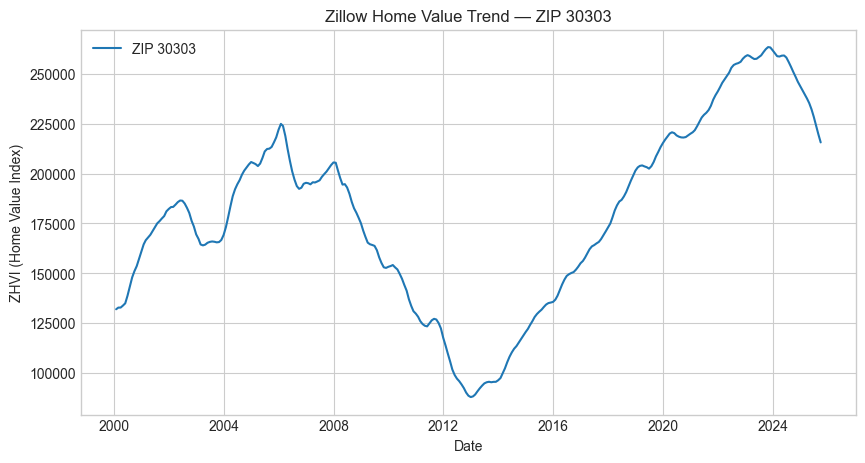

In [6]:
# Plot one ZIP code's home value trend
zip_code = atl_long["RegionName"].iloc[0]
zip_df = atl_long[atl_long["RegionName"] == zip_code]

plt.figure(figsize=(10, 5))
plt.plot(zip_df["Date"], zip_df["ZHVI"], label=f"ZIP {zip_code}")
plt.title(f"Zillow Home Value Trend — ZIP {zip_code}")
plt.xlabel("Date")
plt.ylabel("ZHVI (Home Value Index)")
plt.legend()
plt.show()

In [7]:
# Example: use previous month's value to predict the next month's value
atl_long["ZHVI_lag1"] = atl_long.groupby("RegionName")["ZHVI"].shift(1)
atl_long.dropna(inplace=True)

# Target: current month ZHVI, Feature: last month ZHVI
X = atl_long[["ZHVI_lag1"]]
y = atl_long["ZHVI"]

In [8]:
# Simple 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Model coefficients: [1.00313061]
Intercept: -65.58634306915337


In [10]:
y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 2032.23
R² Score: 0.9997


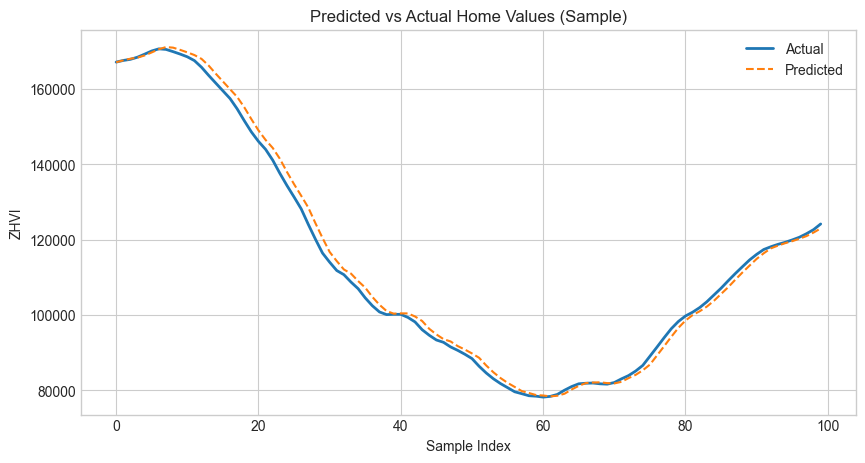

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label="Actual", linewidth=2)
plt.plot(y_pred[:100], label="Predicted", linestyle="--")
plt.title("Predicted vs Actual Home Values (Sample)")
plt.xlabel("Sample Index")
plt.ylabel("ZHVI")
plt.legend()
plt.show()

In [12]:
atl_long.to_csv("../data/processed/atl_long.csv", index=False)
print("Processed data saved.")

Processed data saved.
